### PART 1 :Pandas Big Picture



### Why pandas? 
-  easy to use 
-  easy to learn.
- it is fast 
- it is a powerful data analysis toolkit
- it is open source
- it is supported by many developers (~3k)


<img src="img/Excel_Vs_Pandas.jpg" width="550" height="200" style ="float:center" >

### Two building blocks of pandas are Series and DataFrame
- Series: A 1D labeled data structure with rows.
- DataFrame: A 2D labeled data structure with columns and rows.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
imdb= pd.read_csv('data/imdb_1000.csv')
imdb.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']"
1,9.2,The Godfather,R,Crime,175,"['Marlon Brando', 'Al Pacino', 'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"['Al Pacino', 'Robert De Niro', 'Robert Duvall']"
3,9.0,The Dark Knight,PG-13,Action,152,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh..."
4,8.9,Pulp Fiction,R,Crime,154,"['John Travolta', 'Uma Thurman', 'Samuel L. Ja..."


In [3]:
type(imdb)

pandas.core.frame.DataFrame

In [4]:
type(imdb.title)

pandas.core.series.Series

### some of the basic operation by Pandas


In [8]:
print('Average star Rating for top 1000 movies was: ', imdb.star_rating.mean())
print('Max duration of star Rating for top 1000 movies was: ', imdb.duration.max(),'min')
print('Min duration of star Rating for top 1000 movies was: ', imdb.duration.min(),'min')

Average star Rating for top 1000 movies was:  7.889785495403474
Max duration of star Rating for top 1000 movies was:  242 min
Min duration of star Rating for top 1000 movies was:  64 min


### Lesson
#### 1- Ask Questions and Answer them with Data by Pandas insetad of Jumping to the analysis without knowing the data  <br>
#### 2- Relation does not mean causation. Here we just find the relationship is present in the data.(Causation needs more domain knowledge)  <br>
Q1 : What is the distribution of Geners in the top 1000 movies? <br>
Q2 : What is the distribution of Duration (In every 10 minutes) in the top 1000 movies? <br>
Q3 : what is the average duration of each genre?    <br>
Q4 : what is the average duration of each genre and content rating and star rating? <br>

In [44]:
# What is the distribution of Geners in the top 1000 movies?
imdb.genre.value_counts(normalize=True) * 100

Drama        28.396323
Comedy       15.934627
Action       13.891726
Crime        12.665986
Biography     7.865169
Adventure     7.660878
Animation     6.332993
Horror        2.962206
Mystery       1.634321
Western       0.919305
Sci-Fi        0.510725
Thriller      0.510725
Film-Noir     0.306435
Family        0.204290
History       0.102145
Fantasy       0.102145
Name: genre, dtype: float64

In [19]:
# What is the distribution of Duration (In every 10 minutes) in the top 1000 movies?
# way 1:
bins = [60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250]
labels = ['60-70','70-80','80-90','90-100','100-110','110-120','120-130','130-140','140-150','150-160','160-170','170-180','180-190','190-200','200-210','210-220','220-230','230-240','240-250']

imdb['duration_bin'] = pd.cut(imdb.duration, bins=bins, labels=labels)
imdb.duration_bin.value_counts(normalize=True) * 100

110-120    17.262513
100-110    16.751788
120-130    16.241062
90-100     13.381001
130-140     9.908069
80-90       6.026558
140-150     5.720123
150-160     4.392237
160-170     3.268641
170-180     1.736466
70-80       1.327886
180-190     1.327886
190-200     0.817160
60-70       0.715015
200-210     0.408580
210-220     0.306435
220-230     0.204290
230-240     0.102145
240-250     0.102145
Name: duration_bin, dtype: float64

In [30]:
# way 2: using math function
imdb['duration_bin'] = imdb.duration // 10
imdb.duration_bin.value_counts(normalize=True) * 100

11    17.058223
10    16.853933
12    16.241062
9     12.359551
13    10.929520
14     6.026558
8      5.924413
15     4.494382
16     3.064351
17     2.247191
18     1.430031
7      0.817160
19     0.715015
6      0.612870
20     0.510725
22     0.306435
21     0.204290
23     0.102145
24     0.102145
Name: duration_bin, dtype: float64

In [4]:
# what is the average duration of each genre?
imdb.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

In [7]:
# what is the average duration of each genre and content rating?
imdb.groupby(['genre', 'content_rating']).duration.mean()

genre    content_rating
Action   APPROVED          143.333333
         G                 178.000000
         GP                144.000000
         NOT RATED         129.500000
         PASSED             98.000000
                              ...    
Western  APPROVED          132.000000
         NOT RATED         151.000000
         PG                110.000000
         PG-13             175.000000
         R                 133.666667
Name: duration, Length: 95, dtype: float64

In [8]:
# what is the average duration of each genre and content rating and star rating?
imdb.groupby(['genre', 'content_rating']).agg({'duration':'mean', 'star_rating':'mean'})

duration  star_rating
genre   content_rating                         
Action  APPROVED        143.333333     7.633333
        G               178.000000     7.800000
        GP              144.000000     7.700000
        NOT RATED       129.500000     7.925000
        PASSED           98.000000     7.700000
...                            ...          ...
Western APPROVED        132.000000     8.300000
        NOT RATED       151.000000     8.500000
        PG              110.000000     8.000000
        PG-13           175.000000     8.600000
        R               133.666667     8.133333

[95 rows x 2 columns]

In [11]:
# what is the average duration of each genre and content rating and star rating with Pivot table?
imdb.pivot_table(index=['genre','content_rating'], values='duration', aggfunc='mean')

duration
genre   content_rating            
Action  APPROVED        143.333333
        G               178.000000
        GP              144.000000
        NOT RATED       129.500000
        PASSED           98.000000
...                            ...
Western APPROVED        132.000000
        NOT RATED       151.000000
        PG              110.000000
        PG-13           175.000000
        R               133.666667

[95 rows x 1 columns]

In [19]:
# Practice: How many actors are in the top 1000 movies? 
def len_list(ls):
    ls = ls.replace('[','').replace(']','').split(',')
    return len(ls)
imdb['Actor_num'] = imdb.actors_list.apply(len_list)
imdb.head()


,star_rating,title,content_rating,genre,duration,actors_list,Actor_num
0,9.3,The Shawshank Redemption,R,Crime,142,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton']",3
1,9.2,The Godfather,R,Crime,175,"['Marlon Brando', 'Al Pacino', 'James Caan']",3
2,9.1,The Godfather: Part II,R,Crime,200,"['Al Pacino', 'Robert De Niro', 'Robert Duvall']",3
3,9.0,The Dark Knight,PG-13,Action,152,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",3
4,8.9,Pulp Fiction,R,Crime,154,"['John Travolta', 'Uma Thurman', 'Samuel L. Ja...",3


### Part II : How to use Pandas More effiently

### 95% of people use this kind of code style but only 5% of people know how to use it more efficiently.!

<img src="img/Screenshot1.jpg" width="750" height="500" style ="float:left" >
<img src="img/Screenshot2.jpg" width="750" height="500" style ="float:right" >


### Use chaining and Assign instead of classic coding

In [48]:
bank_df = pd.read_csv('data/bank-full.csv',sep=';') #source --> https://archive.ics.uci.edu/ml/datasets/bank+marketing
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Again Ask Questions and Answer them with Data by Pandas
Q1 : What is the distribution of age(in every decade in data set? <br>
Q2 : Is there relation between age group and balance? <br>
Q3 : Is there relation between marital status and balance? <br>
Q4 : Is there relation between education and balance? <br>
Q5 : Is there relation between occupation and balance? <br>
Q6 : Which job had more default? <br>
Q7 : Which education level had more balance? <br>



In [49]:
def clean_df(df_):
    return (df_
    .replace('unknown', np.nan)
    .replace('yes', 1)
    .replace('no', 0)
    )
bank_df = clean_df(bank_df)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,0,29,1,0,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,0,2,1,1,NaN,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,0,1506,1,0,NaN,5,may,92,1,-1,0,NaN,0
4,33,NaN,single,NaN,0,1,0,0,NaN,5,may,198,1,-1,0,NaN,0


In [55]:
bank_df.isnull().sum()*100 /bank_df.shape[0]

age           0.000000
job           0.637013
marital       0.000000
education     4.107407
default       0.000000
balance       0.000000
housing       0.000000
loan          0.000000
contact      28.798301
day           0.000000
month         0.000000
duration      0.000000
campaign      0.000000
pdays         0.000000
previous      0.000000
poutcome     81.747805
y             0.000000
dtype: float64

In [56]:
def clean_df(df_):
    return (df_
    .replace('unknown', np.nan)
    .replace('yes', 1)
    .replace('no', 0)
    .drop(['poutcome'],axis=1)
    .assign(job=lambda x: x.job.fillna(x.job.mode()[0])
            ,education=lambda x: x.education.fillna(x.education.mode()[0])
            ,contact=lambda x: x.contact.fillna(x.contact.mode()[0]))
    )
bank_df = clean_df(bank_df)
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,cellular,5,may,261,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,cellular,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,cellular,5,may,76,1,-1,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,cellular,5,may,92,1,-1,0,0
4,33,blue-collar,single,secondary,0,1,0,0,cellular,5,may,198,1,-1,0,0


<AxesSubplot:xlabel='education'>

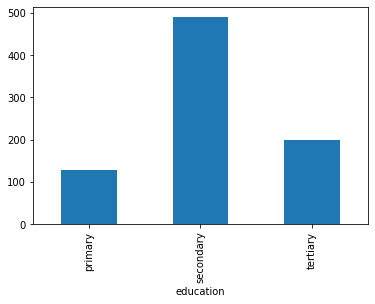

In [39]:
(bank_df
.assign(
        Age_Group = lambda df_: pd.cut(df_.age, bins=[0,20,30,40,50,60,70,80,90,100], labels=['0-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
        ,Age_Group2 = lambda df_ : 10 * (df_.age//10))
#Q1 : What is the distribution of age(in every decade in data set? <br>
        # .Age_Group.value_counts(normalize=True) * 100
        # .Age_Group2.value_counts(normalize=True) * 100


# Q2 : What is the relation between age group and balance? <br>
# .groupby('Age_Group').balance.mean()
# .plot(kind='bar', x='Age_Group', y='balance')


#Q3 : What is the relation between marital status and balance? <br>
# .groupby('marital').balance.mean()
# .plot(kind='bar', x='marital', y='balance')


# Q4 : What is the relation between education and balance? <br>
# .groupby('education').balance.mean()
# .plot(kind='bar', x='education', y='balance')

# Q5 : What is the relation between job and balance? <br>
# .groupby('job').balance.mean()
# .plot(kind='bar', x='job', y='balance')

# Q6 :  Which job had more default? <br>
# .groupby('job').default.sum()
# .plot(kind='bar', x='job', y='default')

# Q7 : Which education level had more default? <br>
.groupby('education').default.sum()
.plot(kind='bar', x='education', y='default')

)


<AxesSubplot:>

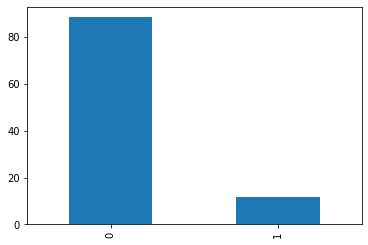

In [59]:
(bank_df.y.value_counts(normalize=True) * 100).plot(kind='bar')

